<a href="https://colab.research.google.com/github/milkpotato1000/project_NVISIA/blob/main/s_news_categorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import gdown
import pandas as pd
import numpy as np
import os

# Google Drive 파일 ID (공유 버튼을 눌러 해당 파일의 URL에서 추출한 파일 ID)
# > full_df_final.csv
# https://drive.google.com/file/d/1V8mFCYrE446qqdx7lAkgLdBmKUEbOtwp/view?usp=drive_link
file_id = '1V8mFCYrE446qqdx7lAkgLdBmKUEbOtwp'
output_path = 'downloaded_file.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)
df = pd.read_csv(output_path) # 코랩~구글 드라이브 사용시

# 로컬에서 로드하는 경우, 경로 및 파일명 지정
# df = pd.read_csv('full_df_final.csv')

display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1V8mFCYrE446qqdx7lAkgLdBmKUEbOtwp
To: /content/downloaded_file.csv
100%|██████████| 41.8M/41.8M [00:00<00:00, 80.4MB/s]


,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd),job_cost
0,spnews_101404,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",북한 평안북도 신의주온실종합농장 건설장에서 방대한 면적의 지대정리와 잔디심기가 마감...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"신의주, 온실농장, 지대정리, 잔디심기, 건설",신의주온실종합농장 건설 마감단계,2025-11-17,NaN,NaN,"평안북도, 신의주",NaN,NaN,NaN,0.000318
1,spnews_101403,"北, 나무 사름률 높이는 제품은?",북한이 나무의 사름률을 보장에 효과적인 과학기술제품으로 천연생물활성제 등이 있다고 ...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"나무, 사름률, 천연생물활성제, 제품, 북한","북한, 나무 사름률 높이는 제품 소개",2025-11-17,NaN,NaN,NaN,NaN,NaN,NaN,0.000335
2,spnews_101402,"北 개성시, 식물방역소·돼지종축장 신축","북한 개성시에서 식물방역소와 돼지종축장 새로 건설했다.\n노동신문은 17일 ""개성시...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다. 개성시식물방역소 건설에 ...,"개성시, 식물방역소, 돼지종축장, 건설, 농업","개성시, 식물방역소와 돼지종축장 신축",2025-11-17,NaN,"개성시식물방역소, 시남새온실, 시유기질복합비료공장",개성시,NaN,NaN,NaN,0.000313
3,spnews_101394,"[北 물가] 가을 추수 영향, 곡물가 내림세",북한지역에서 가을 추수가 마무리 되면서 쌀과 옥수수 등 곡물류 가격이 내림세로 돌아...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,"가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 평양, 혜산, ...","곡물가, 하락, 가을 추수, 물가, 북한",가을 추수로 인한 곡물가 하락,2025-11-15,NaN,NaN,"평양시, 혜산시, 원산시, 사리원시",19850.0,4500.0,34600.0,0.000379
4,spnews_101392,북한 각지서 어머니날 경축... 김일성-김정일 동상 참배,"북한 각지에서 어머니날(11월 16일)을 경축했다.\n노동신문은 17일 ""어머니날을...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,"어머니날, 경축, 동상, 공연, 여성근로자",어머니날 경축 행사,2025-11-16,NaN,NaN,"평안남도, 황해북도, 강원도, 양강도, 나선시, 개성시",NaN,NaN,NaN,0.000316


## 데이터 탐색

In [ ]:
print("Missing values:\n", df[['summary', 'keywords', 'category']].isnull().sum())
print("\nUnique values count:\n", df[['summary', 'keywords', 'category']].nunique())
print("\nCategory distribution:\n", df['category'].value_counts())

Missing values:
 summary     0
keywords    0
category    0
dtype: int64

Unique values count:
 summary     19141
keywords    18681
category        5
dtype: int64

Category distribution:
 category
경제/산업       7016
사회/문화/체육    5855
정치          4912
군사           680
외교           678
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Calculate the value counts of the 'category' column
category_counts = df['category'].value_counts()

# Calculate the percentage distribution
category_percentages = df['category'].value_counts(normalize=True).mul(100).round(2)

# Create a DataFrame for better display
category_distribution_df = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': category_percentages.values
})

# Display the DataFrame
display(category_distribution_df)

,Category,Count,Percentage
0,경제/산업,7016,36.65
1,사회/문화/체육,5855,30.59
2,정치,4912,25.66
3,군사,680,3.55
4,외교,678,3.54


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

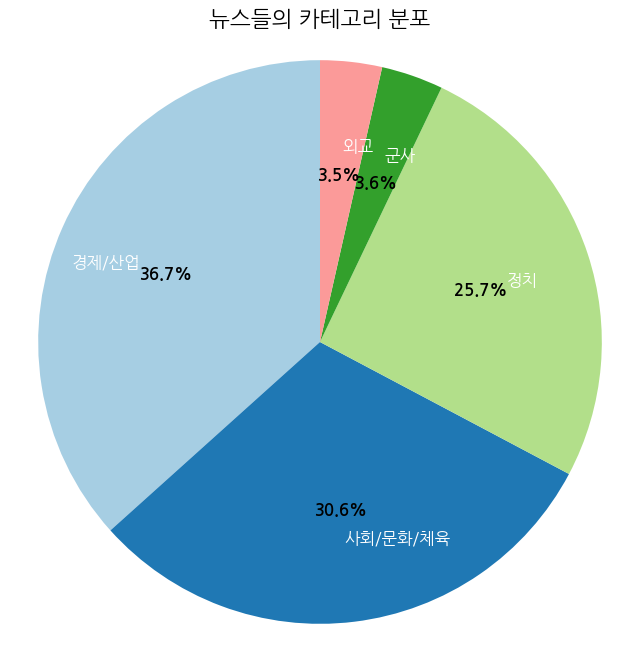

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# Install a Korean font (e.g., NanumGothic) for display
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

# Set the font to NanumGothic for Matplotlib
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # Fix for negative signs in Korean font

# Calculate the value counts of the 'category' column
category_counts = df['category'].value_counts()

# Create a pie chart with labels inside the wedges
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, labeldistance=0.7)

# Customize font sizes for better readability
plt.setp(texts, size=12, color='white') # Set label color to white for better contrast
plt.setp(autotexts, size=12, weight="bold", color='black') # Autotext color for percentages

ax.set_title('뉴스들의 카테고리 분포', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 전처리

In [3]:
import re

def preprocess_text(text):
    if pd.isna(text): # Handle potential NaN values
        return ""
    text = str(text).lower() # 소문자 변환
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text) # 특수문자 제거
    return text

df['preprocessed_summary'] = df['summary'].apply(preprocess_text)
df['preprocessed_keywords'] = df['keywords'].apply(preprocess_text)

print("Preprocessed summary (first 5 rows):\n", df['preprocessed_summary'].head())
print("\nPreprocessed keywords (first 5 rows):\n", df['preprocessed_keywords'].head())

Preprocessed summary (first 5 rows):
 0    신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다 군민건설자...
1    북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다 이 제품은 ...
2    북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다 개성시식물방역소 건설에 여...
3    가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다 평양 혜산 원산 ...
4    북한 각지에서 어머니날을 경축하며 김일성김정일 동상에 꽃다발을 바쳤다 공산주의어머니...
Name: preprocessed_summary, dtype: object

Preprocessed keywords (first 5 rows):
 0    신의주 온실농장 지대정리 잔디심기 건설
1     나무 사름률 천연생물활성제 제품 북한
2    개성시 식물방역소 돼지종축장 건설 농업
3       곡물가 하락 가을 추수 물가 북한
4      어머니날 경축 동상 공연 여성근로자
Name: preprocessed_keywords, dtype: object


## 데이터 벡터화

### a) TF-IDF

In [ ]:
# # TF-IDF 방식

# from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.sparse import hstack
# import numpy as np

# # 'preprocessed_summary' 벡터화
# tfidf_vectorizer_summary = TfidfVectorizer(max_features=20000) # max_features 조정 가능
# X_summary = tfidf_vectorizer_summary.fit_transform(df['preprocessed_summary'])
# print(f"'preprocessed_summary' 벡터화 결과 형태: {X_summary.shape}")

# # 'preprocessed_keywords' 벡터화
# tfidf_vectorizer_keywords = TfidfVectorizer(max_features=5000) # max_features 조정 가능
# X_keywords = tfidf_vectorizer_keywords.fit_transform(df['preprocessed_keywords'])
# print(f"'preprocessed_keywords' 벡터화 결과 형태: {X_keywords.shape}")

# # 두 벡터화된 데이터를 수평으로 결합
# X_combined = hstack([X_summary, X_keywords])

# # 카테고리 라벨 추출
# y_labels = df['category'].values

# print(f"최종 결합된 특징 세트 형태: {X_combined.shape}")
# print(f"카테고리 라벨 형태: {y_labels.shape}")


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 'preprocessed_summary'와 'preprocessed_keywords'를 결합
df['combined_text'] = df['preprocessed_summary'] + " " + df['preprocessed_keywords']

# 결합된 텍스트를 벡터화
tfidf_vectorizer_combined = TfidfVectorizer(max_features=25000) # 이전 결합된 특징 세트 형태와 유사하게 설정
X_combined = tfidf_vectorizer_combined.fit_transform(df['combined_text'])

print(f"'combined_text' 벡터화 결과 형태: {X_combined.shape}")

# 카테고리 라벨 추출
y_labels = df['category'].values

print(f"최종 결합된 특징 세트 형태: {X_combined.shape}")
print(f"카테고리 라벨 형태: {y_labels.shape}")

'combined_text' 벡터화 결과 형태: (19141, 25000)
최종 결합된 특징 세트 형태: (19141, 25000)
카테고리 라벨 형태: (19141,)


In [6]:
tfidf_vectorizer_combined.vocabulary_

{'신의주온실종합농장': np.int64(13587),
 '건설장에서': np.int64(2120),
 '마감단계에': np.int64(7919),
 '이르고': np.int64(16664),
 '있다': np.int64(17278),
 '군민건설자들이': np.int64(4197),
 '진행': np.int64(20617),
 '중인': np.int64(20047),
 '작업은': np.int64(17588),
 '압록강': np.int64(14141),
 '유역의': np.int64(16238),
 '이루어지고': np.int64(16640),
 '주변의': np.int64(19660),
 '활발히': np.int64(24725),
 '진행되고': np.int64(20619),
 '신의주': np.int64(13573),
 '온실농장': np.int64(15308),
 '지대정리': np.int64(20225),
 '잔디심기': np.int64(17621),
 '건설': np.int64(2051),
 '북한이': np.int64(10475),
 '나무의': np.int64(5535),
 '사름률을': np.int64(10956),
 '높이는': np.int64(6318),
 '소개했다': np.int64(12424),
 '제품은': np.int64(19154),
 '뿌리': np.int64(10881),
 '처리에': np.int64(21101),
 '효과적이며': np.int64(24877),
 '가격이': np.int64(1110),
 '낮고': np.int64(5774),
 '효과가': np.int64(24864),
 '좋다고': np.int64(19565),
 '전해졌다': np.int64(18470),
 '또한': np.int64(7757),
 '제품도': np.int64(19145),
 '도움을': np.int64(7318),
 '있다고': np.int64(17279),
 '보도했다': np.int64(10004),
 '나무': np.int64(

#### TF-IDF 벡터 저장

In [8]:
import pickle
import os

# 파일 저장 경로 정의
# TF-IDF 벡터화된 데이터 (희소 행렬)
tfidf_vec_data_save_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined_vec.pkl'
# TF-IDF 벡터화된 데이터 (희소 행렬)
tfidf_data_save_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined.pkl'
# 라벨 데이터 (NumPy 배열)
tfidf_labels_save_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_labels.pkl'

# 디렉토리가 존재하지 않으면 생성
output_dir = os.path.dirname(tfidf_data_save_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# X_combined_vec (TF-IDF 벡터화된 데이터) 저장
with open(tfidf_vec_data_save_path, 'wb') as f:
    pickle.dump(tfidf_vectorizer_combined, f)
print(f"TF-IDF 벡터화된 데이터가 '{tfidf_vec_data_save_path}'에 성공적으로 저장되었습니다.")

# X_combined (TF-IDF 벡터화된 데이터) 저장
with open(tfidf_data_save_path, 'wb') as f:
    pickle.dump(X_combined, f)
print(f"TF-IDF 벡터화된 데이터가 '{tfidf_data_save_path}'에 성공적으로 저장되었습니다.")

# y_labels (카테고리 라벨) 저장
with open(tfidf_labels_save_path, 'wb') as f:
    pickle.dump(y_labels, f)
print(f"카테고리 라벨이 '{tfidf_labels_save_path}'에 성공적으로 저장되었습니다.")

TF-IDF 벡터화된 데이터가 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined.pkl'에 성공적으로 저장되었습니다.
TF-IDF 벡터화된 데이터가 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined.pkl'에 성공적으로 저장되었습니다.
카테고리 라벨이 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_labels.pkl'에 성공적으로 저장되었습니다.


#### TF-IDF 벡터 불러오기

In [13]:
import pickle
import numpy as np
from scipy.sparse import load_npz

# 파일 로드 경로 정의
tfidf_vec_data_load_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined_vec.pkl'
tfidf_data_load_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined.pkl'
tfidf_labels_load_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_labels.pkl'

# X_combined (TF-IDF 벡터화된 데이터) 로드
with open(tfidf_vec_data_load_path, 'rb') as f:
    tfidf_vectorizer_combined = pickle.load(f)
print(f"TF-IDF 벡터화된 데이터가 '{tfidf_vec_data_load_path}'에서 성공적으로 로드되었습니다.")
# print(f"로드된 X_combined 형태: {tfidf_vectorizer_combined.shape}")

# X_combined (TF-IDF 벡터화된 데이터) 로드
with open(tfidf_data_load_path, 'rb') as f:
    X_combined = pickle.load(f)
print(f"TF-IDF 벡터화된 데이터가 '{tfidf_data_load_path}'에서 성공적으로 로드되었습니다.")
print(f"로드된 X_combined 형태: {X_combined.shape}")

# y_labels (카테고리 라벨) 로드
with open(tfidf_labels_load_path, 'rb') as f:
    y_labels = pickle.load(f)
print(f"카테고리 라벨이 '{tfidf_labels_load_path}'에서 성공적으로 로드되었습니다.")
print(f"로드된 y_labels 형태: {y_labels.shape}")

# 로드된 데이터의 일부를 확인
# print("\n로드된 tfidf_vectorizer_combined의 일부 (첫 5개 행):")
# tfidf_vectorizer_combined.vocabulary_
print("\n로드된 X_combined의 일부 (첫 5개 행):")
print(X_combined[:5])
print("\n로드된 y_labels의 일부 (첫 5개):")
print(y_labels[:5])

TF-IDF 벡터화된 데이터가 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined_vec.pkl'에서 성공적으로 로드되었습니다.
TF-IDF 벡터화된 데이터가 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_xcombined.pkl'에서 성공적으로 로드되었습니다.
로드된 X_combined 형태: (19141, 25000)
카테고리 라벨이 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_tfidf_labels.pkl'에서 성공적으로 로드되었습니다.
로드된 y_labels 형태: (19141,)

로드된 X_combined의 일부 (첫 5개 행):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 112 stored elements and shape (5, 25000)>
  Coords	Values
  (0, 13587)	0.2959084052250412
  (0, 2120)	0.22727613581343914
  (0, 7919)	0.19536394787026523
  (0, 16664)	0.2441121722531207
  (0, 17278)	0.1741364030648939
  (0, 4197)	0.2889383173745652
  (0, 20617)	0.13822174646629737
  (0, 20047)	0.2015627399427588
  (0, 17588)	0.23994120010578418
  (0, 14141)	0.21403791980891307
  (0, 16238)	0.28324334093269615
  (0, 16640)	0.1675015935257547
  (0, 19660)	0.26159227051924017
  (0, 24725)	0.15333691845196024
  (0, 20619)	0.12697557

In [14]:
tfidf_vectorizer_combined.vocabulary_

{'신의주온실종합농장': np.int64(13587),
 '건설장에서': np.int64(2120),
 '마감단계에': np.int64(7919),
 '이르고': np.int64(16664),
 '있다': np.int64(17278),
 '군민건설자들이': np.int64(4197),
 '진행': np.int64(20617),
 '중인': np.int64(20047),
 '작업은': np.int64(17588),
 '압록강': np.int64(14141),
 '유역의': np.int64(16238),
 '이루어지고': np.int64(16640),
 '주변의': np.int64(19660),
 '활발히': np.int64(24725),
 '진행되고': np.int64(20619),
 '신의주': np.int64(13573),
 '온실농장': np.int64(15308),
 '지대정리': np.int64(20225),
 '잔디심기': np.int64(17621),
 '건설': np.int64(2051),
 '북한이': np.int64(10475),
 '나무의': np.int64(5535),
 '사름률을': np.int64(10956),
 '높이는': np.int64(6318),
 '소개했다': np.int64(12424),
 '제품은': np.int64(19154),
 '뿌리': np.int64(10881),
 '처리에': np.int64(21101),
 '효과적이며': np.int64(24877),
 '가격이': np.int64(1110),
 '낮고': np.int64(5774),
 '효과가': np.int64(24864),
 '좋다고': np.int64(19565),
 '전해졌다': np.int64(18470),
 '또한': np.int64(7757),
 '제품도': np.int64(19145),
 '도움을': np.int64(7318),
 '있다고': np.int64(17279),
 '보도했다': np.int64(10004),
 '나무': np.int64(

### b) openAI 텍스트 임베딩

#### 임베딩 Query

In [ ]:
# # 텍스트 임베딩 방식
# from google.colab import userdata
# import openai
# import tiktoken # Optional, for token counting
# import numpy as np

# # OpenAI API 키 가져오기 (userdata.get('OPENAI_API_KEY')는 이미 실행되어 있다고 가정)
# openai.api_key = userdata.get('OPENAI_API_KEY')
# client = openai.OpenAI(api_key=openai.api_key)

# def get_embedding(text, model="text-embedding-ada-002"): # text-embedding-3-small # text-embedding-ada-002
#     if not isinstance(text, str):
#         text = str(text)
#     text = text.replace("\n", " ") # 줄바꿈 제거
#     try:
#         return client.embeddings.create(input=[text], model=model).data[0].embedding
#     except Exception as e:
#         print(f"Error getting embedding for text: {text[:50]}... Error: {e}")
#         return [0.0] * 1536 # 오류 발생 시 1536차원 제로 벡터 반환

# print("Generating embeddings for 'preprocessed_summary' using OpenAI 'text-embedding-3-small'...")
# X_summary = np.array(df['preprocessed_summary'].apply(lambda x: get_embedding(x)).tolist())
# print(f"'preprocessed_summary' 임베딩 결과 형태: {X_summary.shape}")

# print("Generating embeddings for 'preprocessed_keywords' using OpenAI 'text-embedding-3-small'...")
# X_keywords = np.array(df['preprocessed_keywords'].apply(lambda x: get_embedding(x)).tolist())
# print(f"'preprocessed_keywords' 임베딩 결과 형태: {X_keywords.shape}")

# # 두 임베딩 데이터를 수평으로 결합
# X_combined = np.hstack([X_summary, X_keywords])

# # 카테고리 라벨 추출
# y_labels = df['category'].values

# print(f"최종 결합된 특징 세트 형태: {X_combined.shape}")
# print(f"카테고리 라벨 형태: {y_labels.shape}")

Generating embeddings for 'preprocessed_summary' using OpenAI 'text-embedding-3-small'...
'preprocessed_summary' 임베딩 결과 형태: (19141, 1536)
Generating embeddings for 'preprocessed_keywords' using OpenAI 'text-embedding-3-small'...
'preprocessed_keywords' 임베딩 결과 형태: (19141, 1536)
최종 결합된 특징 세트 형태: (19141, 3072)
카테고리 라벨 형태: (19141,)


#### 파일로 저장

In [ ]:
# # 임베딩 결과값을 파일로 저장
# import pandas as pd
# import numpy as np
# import os

# # X_combined와 y_labels를 하나의 DataFrame으로 결합
# # 컬럼 이름을 "feature_0", "feature_1" ... 등으로 지정
# feature_columns = [f"feature_{i}" for i in range(X_combined.shape[1])]
# df_embeddings = pd.DataFrame(X_combined, columns=feature_columns)
# df_embeddings['category'] = y_labels

# # 원본 df의 'id' 컬럼도 함께 저장
# df_embeddings['id'] = df['id']

# # 저장할 경로 지정
# output_csv_path = '/content/drive/MyDrive/Colab Notebooks/sia_embed_aida.csv'

# # Google Drive 마운트 확인 (이미 마운트되었다고 가정)
# # drive.mount('/content/drive') # 필요시 주석 해제

# # 디렉토리 존재 여부 확인 및 생성
# output_dir = os.path.dirname(output_csv_path)
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # CSV 파일로 저장
# df_embeddings.to_csv(output_csv_path, index=False)

# print(f"OpenAI 임베딩 데이터가 '{output_csv_path}'에 성공적으로 저장되었습니다.")
# print("저장된 데이터의 처음 5행:")
# display(df_embeddings.head())

OpenAI 임베딩 데이터가 '/content/drive/MyDrive/Colab Notebooks/sia_embed_aida.csv'에 성공적으로 저장되었습니다.
저장된 데이터의 처음 5행:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3064,feature_3065,feature_3066,feature_3067,feature_3068,feature_3069,feature_3070,feature_3071,category,id
0,-0.007859,-0.018373,0.006352,-0.008057,-0.028852,0.033996,-0.036174,0.000231,-0.021625,0.006145,...,0.027780,-0.024706,0.011495,-0.010047,0.014439,-0.013149,0.002754,0.009066,경제/산업,spnews_101404
1,-0.012426,0.005019,0.015647,-0.017512,0.004150,0.019892,-0.041160,-0.019588,-0.029177,0.008095,...,0.048634,-0.009011,0.021772,0.009999,0.001535,-0.018062,-0.002667,0.007277,경제/산업,spnews_101403
2,-0.014554,-0.015554,0.006368,-0.022165,-0.025590,0.025230,-0.045556,-0.000989,-0.000693,0.011775,...,0.018235,-0.011711,-0.004754,0.021379,0.006460,-0.008204,0.003524,0.005012,사회/문화/체육,spnews_101402
3,-0.003978,-0.022667,0.017103,-0.028354,-0.027411,0.013582,-0.026905,0.006224,-0.029530,-0.023610,...,0.009117,-0.010936,0.015299,0.033657,-0.012480,-0.017297,0.010737,0.025084,경제/산업,spnews_101394
4,-0.029859,-0.033571,0.005302,-0.025027,-0.014232,0.019669,-0.040628,0.014363,-0.015680,-0.022420,...,0.020975,-0.019858,0.020137,0.034852,-0.020842,-0.007370,0.000954,0.005775,사회/문화/체육,spnews_101392


#### 파일 불러오기

In [ ]:
# # 저장한 임베딩 데이터를 불러오고 모델링 준비
# import pandas as pd
# import numpy as np

# # Google Drive 마운트 확인 (이미 마운트되었다고 가정)
# # drive.mount('/content/drive') # 필요시 주석 해제

# # 저장된 파일 경로
# input_csv_path = '/content/drive/MyDrive/Colab Notebooks/sia_embed_aida.csv'

# # CSV 파일 불러오기
# df_loaded = pd.read_csv(input_csv_path)

# print(f"'{input_csv_path}'에서 데이터를 성공적으로 불러왔습니다.")
# display(df_loaded.head())

# # 특징과 라벨 분리 (id는 버림)
# X_combined = df_loaded.drop(columns=['category','id']).values
# y_labels = df_loaded['category'].values

# print(f"불러온 X_combined 형태: {X_combined.shape}")
# print(f"불러온 y_labels 형태: {y_labels.shape}")



'/content/drive/MyDrive/Colab Notebooks/sia_embed_aida.csv'에서 데이터를 성공적으로 불러왔습니다.


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3064,feature_3065,feature_3066,feature_3067,feature_3068,feature_3069,feature_3070,feature_3071,category,id
0,-0.007859,-0.018373,0.006352,-0.008057,-0.028852,0.033996,-0.036174,0.000231,-0.021625,0.006145,...,0.027780,-0.024706,0.011495,-0.010047,0.014439,-0.013149,0.002754,0.009066,경제/산업,spnews_101404
1,-0.012426,0.005019,0.015647,-0.017512,0.004150,0.019892,-0.041160,-0.019588,-0.029177,0.008095,...,0.048634,-0.009011,0.021772,0.009999,0.001535,-0.018062,-0.002667,0.007277,경제/산업,spnews_101403
2,-0.014554,-0.015554,0.006368,-0.022165,-0.025590,0.025230,-0.045556,-0.000989,-0.000693,0.011775,...,0.018235,-0.011711,-0.004754,0.021379,0.006460,-0.008204,0.003524,0.005012,사회/문화/체육,spnews_101402
3,-0.003978,-0.022667,0.017103,-0.028354,-0.027411,0.013582,-0.026905,0.006224,-0.029530,-0.023610,...,0.009117,-0.010936,0.015299,0.033657,-0.012480,-0.017297,0.010737,0.025084,경제/산업,spnews_101394
4,-0.029859,-0.033571,0.005302,-0.025027,-0.014232,0.019669,-0.040628,0.014363,-0.015680,-0.022420,...,0.020975,-0.019858,0.020137,0.034852,-0.020842,-0.007370,0.000954,0.005775,사회/문화/체육,spnews_101392


불러온 X_combined 형태: (19141, 3072)
불러온 y_labels 형태: (19141,)


## 모델 학습 및 평가 준비

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# Get original indices from df to link back after splitting
original_indices = df.index

# 데이터를 훈련 세트와 테스트 세트로 분리
# original_indices도 함께 분리하여 X_test에 해당하는 원본 데이터의 인덱스를 얻습니다.
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X_combined, y_labels, original_indices,
    test_size=0.2, random_state=42, stratify=y_labels
)

# 분리된 데이터 형태 확인
print(f"X_train 형태: {X_train.shape}")
print(f"X_test 형태: {X_test.shape}")
print(f"y_train 형태: {y_train.shape}")
print(f"y_test 형태: {y_test.shape}")
print(f"train_indices 형태: {train_indices.shape}")
print(f"test_indices 형태: {test_indices.shape}")

X_train 형태: (15312, 25000)
X_test 형태: (3829, 25000)
y_train 형태: (15312,)
y_test 형태: (3829,)
train_indices 형태: (15312,)
test_indices 형태: (3829,)


## 모델 학습 및 성능 평가

In [16]:
from sklearn.preprocessing import LabelEncoder

# 타겟 라벨을 수치형 값으로 인코딩
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 학습할 모델 정의 (듀얼코어 사용 옵션 포함)
models = {
    #'로지스틱 회귀': LogisticRegression(random_state=42, max_iter=1000, solver='saga', n_jobs=-1),
    #'랜덤 포레스트': RandomForestClassifier(random_state=42, n_jobs=-1),
    'SVM (선형 커널)': SVC(kernel='linear', probability=True, random_state=42)
    # '다항 나이브 베이즈': MultinomialNB(),
    #'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False),
    #'LightGBM': LGBMClassifier(random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\n--- {name} 모델 학습 중 ---")
    model.fit(X_train, y_train_encoded) # 인코딩된 라벨로 학습
    y_pred = model.predict(X_test)

    # 기본 평가 지표 계산
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='macro', zero_division=0)

    print(f"정확도 (Accuracy): {accuracy:.4f}")
    print(f"정밀도 (Precision, macro): {precision:.4f}")
    print(f"재현율 (Recall, macro): {recall:.4f}")
    print(f"F1 스코어 (F1 Score, macro): {f1:.4f}")

    # 다중 클래스 ROC AUC 스코어 계산 (one-vs-rest)
    roc_auc = None
    try:
        y_pred_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='macro')
        print(f"ROC AUC (macro, ovr): {roc_auc:.4f}")
    except AttributeError:
        print("해당 모델은 predict_proba를 지원하지 않아 ROC AUC를 계산하지 않습니다.")
    except ValueError as e:
        print(f"ROC AUC 계산 오류: {e}")

    # 결과 저장
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

print("\n--- 모델 성능 비교 ---")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name.replace('_', ' ').title()}: {value:.4f}")
        else:
            print(f"  {metric_name.replace('_', ' ').title()}: N/A")

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\n모델 성능 요약 (업데이트):")
display(results_df)



--- SVM (선형 커널) 모델 학습 중 ---
정확도 (Accuracy): 0.8104
정밀도 (Precision, macro): 0.7808
재현율 (Recall, macro): 0.6813
F1 스코어 (F1 Score, macro): 0.7168
ROC AUC (macro, ovr): 0.9562

--- 모델 성능 비교 ---
SVM (선형 커널):
  Accuracy: 0.8104
  Precision: 0.7808
  Recall: 0.6813
  F1 Score: 0.7168
  Roc Auc: 0.9562

모델 성능 요약 (업데이트):


,accuracy,precision,recall,f1_score,roc_auc
SVM (선형 커널),0.810394,0.780782,0.681298,0.716778,0.956241


## 피클로 모델(SVM) 데이터 저장

### 모델, 레이블 인코더 저장

In [18]:
import pickle
import os

# 파일 저장 경로 정의
model_save_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_model.pkl'
label_encoder_save_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_label_en.pkl'

# 디렉토리가 존재하지 않으면 생성
output_dir = os.path.dirname(model_save_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 학습된 SVM 모델 저장
with open(model_save_path, 'wb') as f:
    pickle.dump(models['SVM (선형 커널)'], f)
print(f"SVM 모델이 '{model_save_path}'에 성공적으로 저장되었습니다.")

# 라벨 인코더 저장
with open(label_encoder_save_path, 'wb') as f:
    pickle.dump(label_encoder, f)
print(f"라벨 인코더가 '{label_encoder_save_path}'에 성공적으로 저장되었습니다.")

SVM 모델이 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_model.pkl'에 성공적으로 저장되었습니다.
라벨 인코더가 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_label_en.pkl'에 성공적으로 저장되었습니다.


### 로드후 예측 진행(샘플 코드)

In [19]:
import pickle
import numpy as np
import pandas as pd

# 파일 로드 경로 정의
model_load_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_model.pkl'
label_encoder_load_path = '/content/drive/MyDrive/Colab Notebooks/s_news_cate_label_en.pkl'

# 학습된 SVM 모델 로드
with open(model_load_path, 'rb') as f:
    loaded_svm_model = pickle.load(f)
print(f"SVM 모델이 '{model_load_path}'에서 성공적으로 로드되었습니다.")

# 레이블 인코더 로드
with open(label_encoder_load_path, 'rb') as f:
    loaded_label_encoder = pickle.load(f)
print(f"레이블 인코더가 '{label_encoder_load_path}'에서 성공적으로 로드되었습니다.")

# 예측을 위한 X_test의 작은 부분집합 선택 (예: 처음 5개 샘플)
sample_indices = range(5)
sample_X_test = X_test[sample_indices]
sample_y_test_encoded = y_test_encoded[sample_indices]
sample_y_test_original = y_test[sample_indices]

# 로드된 모델을 사용하여 샘플 데이터에 대한 클래스 라벨 예측
predicted_labels_encoded = loaded_svm_model.predict(sample_X_test)

# 예측된 숫자 라벨을 원래의 카테고리 이름으로 디코딩
predicted_category_names = loaded_label_encoder.inverse_transform(predicted_labels_encoded)

print("\n--- 샘플 예측 결과 ---")
for i in range(sample_X_test.shape[0]): # 수정: 희소 행렬의 경우 .shape[0] 사용
    print(f"샘플 {i+1}:")
    print(f"  실제 카테고리 (원본): {sample_y_test_original[i]}")
    print(f"  실제 카테고리 (인코딩): {sample_y_test_encoded[i]}")
    print(f"  예측 카테고리 (인코딩): {predicted_labels_encoded[i]}")
    print(f"  예측 카테고리 (디코딩): {predicted_category_names[i]}")

SVM 모델이 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_model.pkl'에서 성공적으로 로드되었습니다.
레이블 인코더가 '/content/drive/MyDrive/Colab Notebooks/s_news_cate_label_en.pkl'에서 성공적으로 로드되었습니다.

--- 샘플 예측 결과 ---
샘플 1:
  실제 카테고리 (원본): 사회/문화/체육
  실제 카테고리 (인코딩): 2
  예측 카테고리 (인코딩): 2
  예측 카테고리 (디코딩): 사회/문화/체육
샘플 2:
  실제 카테고리 (원본): 정치
  실제 카테고리 (인코딩): 4
  예측 카테고리 (인코딩): 1
  예측 카테고리 (디코딩): 군사
샘플 3:
  실제 카테고리 (원본): 정치
  실제 카테고리 (인코딩): 4
  예측 카테고리 (인코딩): 4
  예측 카테고리 (디코딩): 정치
샘플 4:
  실제 카테고리 (원본): 사회/문화/체육
  실제 카테고리 (인코딩): 2
  예측 카테고리 (인코딩): 2
  예측 카테고리 (디코딩): 사회/문화/체육
샘플 5:
  실제 카테고리 (원본): 사회/문화/체육
  실제 카테고리 (인코딩): 2
  예측 카테고리 (인코딩): 2
  예측 카테고리 (디코딩): 사회/문화/체육


## 평가결과 시각화(SVM)

### Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np

# SVM 모델 예측 결과
svm_model = models['SVM (선형 커널)']
y_pred_svm = svm_model.predict(X_test)

# 결과를 저장할 리스트
category_results = []

# 각 카테고리별로 정확하게 맞춘 것과 틀린 것 계산
for i, category_name in enumerate(label_encoder.classes_):
    # 해당 카테고리에 속하는 실제 라벨과 예측 라벨 필터링
    true_indices = np.where(y_test_encoded == i)
    actual_for_category = y_test_encoded[true_indices]
    predicted_for_category = y_pred_svm[true_indices]

    # 정확하게 맞춘 개수
    correct_count = np.sum(actual_for_category == predicted_for_category)
    # 틀린 개수
    incorrect_count = np.sum(actual_for_category != predicted_for_category)

    category_results.append({
        'Category': category_name,
        'Correct Predictions': correct_count,
        'Incorrect Predictions': incorrect_count
    })

# DataFrame 생성
summary_df = pd.DataFrame(category_results)

# 총합 계산
total_correct = summary_df['Correct Predictions'].sum()
total_incorrect = summary_df['Incorrect Predictions'].sum()

# 총합 행 추가
total_row = pd.DataFrame([{
    'Category': 'Total',
    'Correct Predictions': total_correct,
    'Incorrect Predictions': total_incorrect
}])

summary_df_with_total = pd.concat([summary_df, total_row], ignore_index=True)

display(summary_df_with_total)

,Category,Correct Predictions,Incorrect Predictions
0,경제/산업,1230,173
1,군사,69,67
2,사회/문화/체육,921,250
3,외교,68,68
4,정치,808,175
5,Total,3096,733


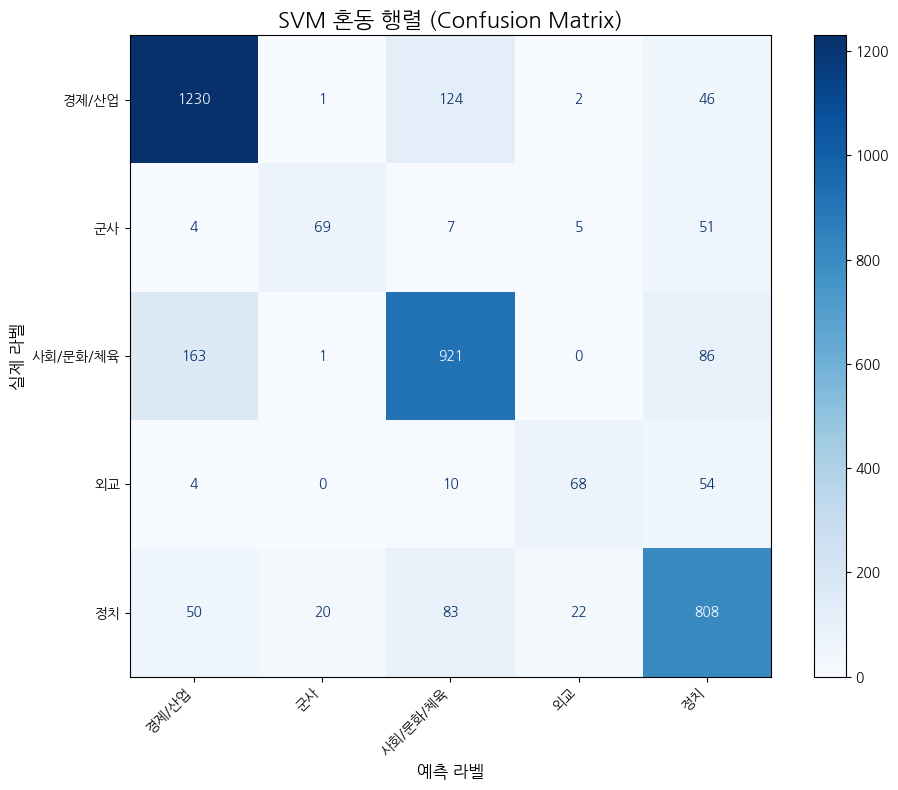

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get the trained SVM model from the 'models' dictionary
svm_model = models['SVM (선형 커널)']

# Predict on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_svm)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('SVM 혼동 행렬 (Confusion Matrix)', fontsize=16)
plt.xlabel('예측 라벨', fontsize=12)
plt.ylabel('실제 라벨', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### ROC-AUC Curve

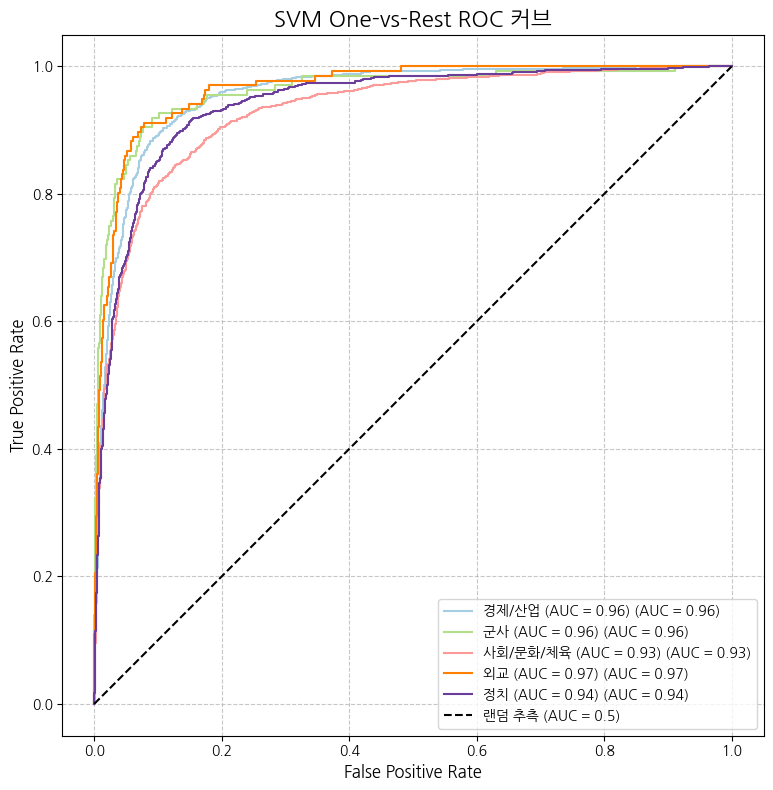

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Get the trained SVM model and its prediction probabilities
svm_model = models['SVM (선형 커널)']

# Ensure predict_proba is available
if not hasattr(svm_model, 'predict_proba'):
    print("SVM 모델은 predict_proba를 지원하지 않습니다. ROC-AUC 커브를 그릴 수 없습니다.")
else:
    y_pred_proba_svm = svm_model.predict_proba(X_test)

    # Binarize the true labels for OVR plotting
    lb = LabelBinarizer()
    y_test_onehot = lb.fit_transform(y_test_encoded)
    num_classes = len(label_encoder.classes_)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(num_classes):
        RocCurveDisplay.from_predictions(
            y_test_onehot[:, i],
            y_pred_proba_svm[:, i],
            name=f"{label_encoder.classes_[i]} (AUC = {roc_auc_score(y_test_onehot[:, i], y_pred_proba_svm[:, i]):.2f})",
            ax=ax,
            color=plt.cm.Paired(i / num_classes) # Use a color map for distinct colors
        )

    plt.plot([0, 1], [0, 1], "k--", label="랜덤 추측 (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("SVM One-vs-Rest ROC 커브", fontsize=16)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

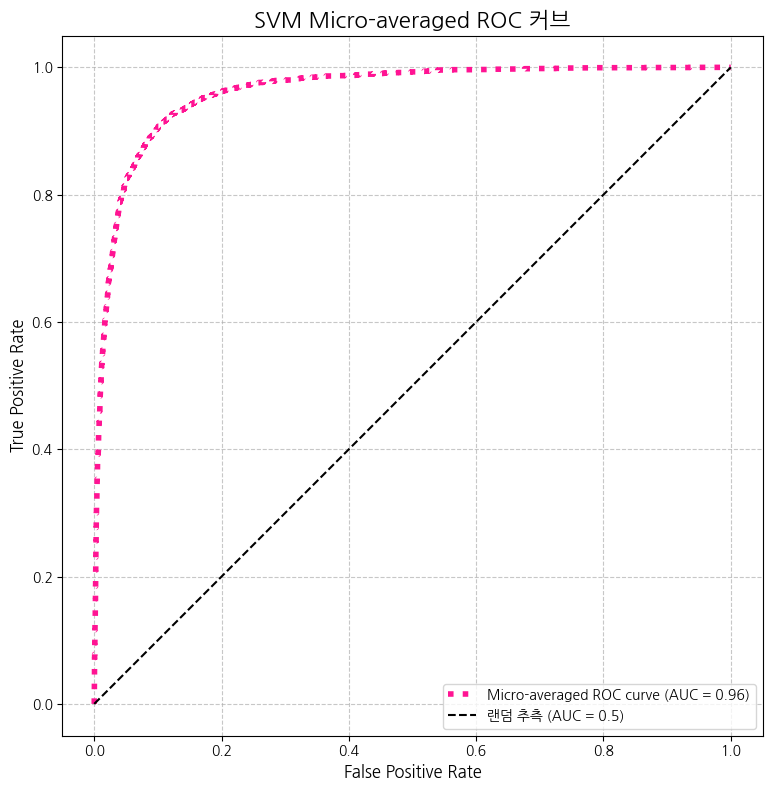

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Get the trained SVM model and its prediction probabilities
svm_model = models['SVM (선형 커널)']

if not hasattr(svm_model, 'predict_proba'):
    print("SVM 모델은 predict_proba를 지원하지 않아 ROC AUC 커브를 그릴 수 없습니다.")
else:
    y_pred_proba_svm = svm_model.predict_proba(X_test)

    # Binarize the true labels for micro-averaged ROC curve
    lb = LabelBinarizer()
    y_test_onehot = lb.fit_transform(y_test_encoded)

    # Compute micro-averaged ROC curve and AUC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_onehot.ravel(), y_pred_proba_svm.ravel())
    auc_micro = roc_auc_score(y_test_onehot, y_pred_proba_svm, multi_class='ovr', average='micro')

    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot micro-averaged ROC curve
    ax.plot(fpr_micro, tpr_micro, label=f'Micro-averaged ROC curve (AUC = {auc_micro:.2f})', color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], "k--", label="랜덤 추측 (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("SVM Micro-averaged ROC 커브", fontsize=16)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 오분류 목록 저장(SVM)

In [ ]:
import pandas as pd
import numpy as np
import os

# SVM 모델 예측
svm_model = models['SVM (선형 커널)']
y_pred_svm = svm_model.predict(X_test)

# 오분류된 항목의 인덱스 찾기
misclassified_test_indices = np.where(y_pred_svm != y_test_encoded)[0]

# test_indices를 사용하여 원본 df에서 오분류된 항목의 id 추출
misclassified_original_indices = test_indices[misclassified_test_indices]
misclassified_ids = df.loc[misclassified_original_indices, 'id']

# 오분류된 id들을 DataFrame으로 생성
misclassified_df = pd.DataFrame({'id': misclassified_ids})

# 파일 저장 경로 설정
output_csv_path = '/content/drive/MyDrive/Colab Notebooks/sia_incorrect.csv'

# 디렉토리 존재 여부 확인 및 생성
output_dir = os.path.dirname(output_csv_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# CSV 파일로 저장
misclassified_df.to_csv(output_csv_path, index=False)

print(f"오분류된 항목의 ID 목록이 '{output_csv_path}'에 성공적으로 저장되었습니다.")
print("저장된 데이터의 처음 5행:")
display(misclassified_df.head())

오분류된 항목의 ID 목록이 '/content/drive/MyDrive/Colab Notebooks/sia_incorrect.csv'에 성공적으로 저장되었습니다.
저장된 데이터의 처음 5행:


,id
7349,spnews_61596
18974,spnews_703
6520,spnews_65907
4873,spnews_74077
5324,spnews_71704


In [ ]:
print(misclassified_df.shape[0])

733


##TensorFlow 딥러닝 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

print(f"X_train_dense shape: {X_train_dense.shape}")
print(f"X_test_dense shape: {X_test_dense.shape}")

X_train_dense shape: (5526, 25000)
X_test_dense shape: (1382, 25000)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

num_classes = y_train_encoded.max() + 1

# Define the TensorFlow Keras Sequential model
model_tf = Sequential([
    Input(shape=(X_train_dense.shape[1],)), # Use Input layer to specify input shape
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\n--- TensorFlow MLP 모델 학습 중 ---")
model_tf.fit(X_train_dense, y_train_encoded, epochs=50, batch_size=32) # verbose=0 to suppress epoch output
print("TensorFlow MLP 모델 학습 완료.")

# Evaluate the trained model
y_pred_proba_tf = model_tf.predict(X_test_dense)
y_pred_tf = np.argmax(y_pred_proba_tf, axis=1)

# Calculate basic metrics
accuracy_tf = accuracy_score(y_test_encoded, y_pred_tf)
precision_tf = precision_score(y_test_encoded, y_pred_tf, average='macro', zero_division=0)
recall_tf = recall_score(y_test_encoded, y_pred_tf, average='macro', zero_division=0)
f1_tf = f1_score(y_test_encoded, y_pred_tf, average='macro', zero_division=0)

print(f"정확도 (Accuracy): {accuracy_tf:.4f}")
print(f"정밀도 (Precision, macro): {precision_tf:.4f}")
print(f"재현율 (Recall, macro): {recall_tf:.4f}")
print(f"F1 스코어 (F1 Score, macro): {f1_tf:.4f}")

# Calculate ROC AUC score for multiclass (one-vs-rest)
roc_auc_tf = None
try:
    roc_auc_tf = roc_auc_score(y_test_encoded, y_pred_proba_tf, multi_class='ovr', average='macro')
    print(f"ROC AUC (macro, ovr): {roc_auc_tf:.4f}")
except ValueError as e:
    print(f"ROC AUC 계산 오류: {e}")

# Store results
results['TensorFlow MLP'] = {
    'accuracy': accuracy_tf,
    'precision': precision_tf,
    'recall': recall_tf,
    'f1_score': f1_tf,
    'roc_auc': roc_auc_tf
}

print("\n--- 모델 성능 비교 (TensorFlow MLP 추가) ---")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name.replace('_', ' ').title()}: {value:.4f}")
        else:
            print(f"  {metric_name.replace('_', ' ').title()}: N/A")

# 결과를 DataFrame으로 변환 및 업데이트
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\n모델 성능 요약 (최종 업데이트):")
display(results_df)


--- TensorFlow MLP 모델 학습 중 ---
Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6663 - loss: 0.8491
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9461 - loss: 0.1752
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9942 - loss: 0.0264
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9991 - loss: 0.0053
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9998 - loss: 0.0018
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 8.7855e-04
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 5.4391e-04
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.9021e-04
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.8458e-04
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.1976e-04
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 1.7480e

,accuracy,precision,recall,f1_score,roc_auc
로지스틱 회귀,0.821274,0.799943,0.725356,0.755069,0.958041
랜덤 포레스트,0.782923,0.790972,0.679723,0.701499,0.944151
SVM (선형 커널),0.830680,0.808433,0.765945,0.784791,0.956873
다항 나이브 베이즈,0.803184,0.786991,0.699451,0.720733,0.948913
XGBoost,0.774964,0.751638,0.692973,0.717220,0.938281
LightGBM,0.769899,0.760505,0.695136,0.721088,0.935833
MLPClassifier,0.816932,0.763008,0.748779,0.755486,0.953398
TensorFlow MLP,0.823444,0.777459,0.754891,0.765364,0.952069


## SMOTE 적용: ML모델

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Initialize SMOTE with random_state=42
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Print the shapes of the resampled datasets to verify changes
print(f"Original X_train shape: {X_train.shape}")
print(f"Resampled X_train shape: {X_train_resampled.shape}")
print(f"Original y_train shape: {y_train_encoded.shape}")
print(f"Resampled y_train shape: {y_train_resampled.shape}")

# Display the class distribution before and after SMOTE
print("\nClass distribution before SMOTE:\n", pd.Series(y_train_encoded).value_counts())
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Original X_train shape: (15312, 25000)
Resampled X_train shape: (28065, 25000)
Original y_train shape: (15312,)
Resampled y_train shape: (28065,)

Class distribution before SMOTE:
 0    5613
2    4684
4    3929
1     544
3     542
Name: count, dtype: int64

Class distribution after SMOTE:
 2    5613
0    5613
4    5613
3    5613
1    5613
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Define models to train
models_smote = {
    '로지스틱 회귀 (SMOTE)': LogisticRegression(random_state=42, max_iter=1000, solver='saga', n_jobs=-1),
    '랜덤 포레스트 (SMOTE)': RandomForestClassifier(random_state=42, n_jobs=-1),
    'SVM (선형 커널) (SMOTE)': SVC(kernel='linear', probability=True, random_state=42),
    # '다항 나이브 베이즈 (SMOTE)': MultinomialNB(),
    'XGBoost (SMOTE)': XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False),
    'LightGBM (SMOTE)': LGBMClassifier(random_state=42, n_jobs=-1)
}

results_smote = {}

for name, model in models_smote.items():
    print(f"\n--- {name} 모델 학습 중 ---")
    model.fit(X_train_resampled, y_train_resampled) # Fit with resampled labels
    y_pred = model.predict(X_test)

    # Calculate basic metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='macro', zero_division=0)

    print(f"정확도 (Accuracy): {accuracy:.4f}")
    print(f"정밀도 (Precision, macro): {precision:.4f}")
    print(f"재현율 (Recall, macro): {recall:.4f}")
    print(f"F1 스코어 (F1 Score, macro): {f1:.4f}")

    # Calculate ROC AUC score for multiclass (one-vs-rest)
    roc_auc = None
    try:
        y_pred_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='macro')
        print(f"ROC AUC (macro, ovr): {roc_auc:.4f}")
    except AttributeError:
        print("해당 모델은 predict_proba를 지원하지 않아 ROC AUC를 계산하지 않습니다.")
    except ValueError as e:
        print(f"ROC AUC 계산 오류: {e}")

    # Store results
    results_smote[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

print("\n--- SMOTE 적용 모델 성능 비교 ---")
for name, metrics in results_smote.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name.replace('_', ' ').title()}: {value:.4f}")
        else:
            print(f"  {metric_name.replace('_', ' ').title()}: N/A")

# Combine results with previous results
results_df_smote = pd.DataFrame.from_dict(results_smote, orient='index')
# Merge with previous results_df if it exists, otherwise just use results_df_smote
if 'results_df' in globals():
    results_df = pd.concat([results_df, results_df_smote])
else:
    results_df = results_df_smote

print("\n모델 성능 요약 (SMOTE 적용 모델 추가):")
display(results_df)


--- 로지스틱 회귀 (SMOTE) 모델 학습 중 ---
정확도 (Accuracy): 0.8026
정밀도 (Precision, macro): 0.7185
재현율 (Recall, macro): 0.7398
F1 스코어 (F1 Score, macro): 0.7281
ROC AUC (macro, ovr): 0.9502

--- 랜덤 포레스트 (SMOTE) 모델 학습 중 ---
정확도 (Accuracy): 0.7448
정밀도 (Precision, macro): 0.7057
재현율 (Recall, macro): 0.6299
F1 스코어 (F1 Score, macro): 0.6552
ROC AUC (macro, ovr): 0.9375

--- SVM (선형 커널) (SMOTE) 모델 학습 중 ---
정확도 (Accuracy): 0.8044
정밀도 (Precision, macro): 0.7571
재현율 (Recall, macro): 0.7097
F1 스코어 (F1 Score, macro): 0.7302
ROC AUC (macro, ovr): 0.9312

--- XGBoost (SMOTE) 모델 학습 중 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:06:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


정확도 (Accuracy): 0.7495
정밀도 (Precision, macro): 0.7037
재현율 (Recall, macro): 0.6571
F1 스코어 (F1 Score, macro): 0.6762
ROC AUC (macro, ovr): 0.9261

--- LightGBM (SMOTE) 모델 학습 중 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.039798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255787
[LightGBM] [Info] Number of data points in the train set: 28065, number of used features: 7686
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


정확도 (Accuracy): 0.7644
정밀도 (Precision, macro): 0.7078
재현율 (Recall, macro): 0.6751
F1 스코어 (F1 Score, macro): 0.6895


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ROC AUC (macro, ovr): 0.9345

--- SMOTE 적용 모델 성능 비교 ---
로지스틱 회귀 (SMOTE):
  Accuracy: 0.8026
  Precision: 0.7185
  Recall: 0.7398
  F1 Score: 0.7281
  Roc Auc: 0.9502
랜덤 포레스트 (SMOTE):
  Accuracy: 0.7448
  Precision: 0.7057
  Recall: 0.6299
  F1 Score: 0.6552
  Roc Auc: 0.9375
SVM (선형 커널) (SMOTE):
  Accuracy: 0.8044
  Precision: 0.7571
  Recall: 0.7097
  F1 Score: 0.7302
  Roc Auc: 0.9312
XGBoost (SMOTE):
  Accuracy: 0.7495
  Precision: 0.7037
  Recall: 0.6571
  F1 Score: 0.6762
  Roc Auc: 0.9261
LightGBM (SMOTE):
  Accuracy: 0.7644
  Precision: 0.7078
  Recall: 0.6751
  F1 Score: 0.6895
  Roc Auc: 0.9345

모델 성능 요약 (SMOTE 적용 모델 추가):


,accuracy,precision,recall,f1_score,roc_auc
로지스틱 회귀,0.807260,0.787021,0.665086,0.704727,0.953674
랜덤 포레스트,0.744842,0.770915,0.552839,0.583159,0.933167
SVM (선형 커널),0.808566,0.776907,0.698505,0.729150,0.951566
XGBoost,0.748237,0.704442,0.624776,0.653840,0.925893
LightGBM,0.765735,0.717327,0.632927,0.663071,0.932142
로지스틱 회귀 (SMOTE),0.802559,0.718499,0.739819,0.728063,0.950174
랜덤 포레스트 (SMOTE),0.744842,0.705710,0.629868,0.655164,0.937508
SVM (선형 커널) (SMOTE),0.804388,0.757111,0.709704,0.730218,0.931172
XGBoost (SMOTE),0.749543,0.703657,0.657081,0.676250,0.926066
LightGBM (SMOTE),0.764429,0.707777,0.675117,0.689485,0.934525


## SMOTE 적용: TensorFlow

In [ ]:
X_train_resampled_dense = X_train_resampled.toarray()

print(f"Resampled X_train_dense shape: {X_train_resampled_dense.shape}")

Resampled X_train_dense shape: (11760, 25000)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# 1. num_classes 변수 정의
num_classes = y_train_resampled.max() + 1

# 2. TensorFlow Keras Sequential 모델 정의
model_tf_smote = Sequential([
    Input(shape=(X_train_resampled_dense.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# 3. 모델 컴파일
model_tf_smote.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. 모델 훈련
print("\n--- TensorFlow MLP (SMOTE) 모델 학습 중 ---")
model_tf_smote.fit(X_train_resampled_dense, y_train_resampled, epochs=50, batch_size=32, verbose=0)
print("TensorFlow MLP (SMOTE) 모델 학습 완료.")

# 6. X_test는 이미 X_test_dense로 변환되어 있습니다.

# 7. 훈련된 모델을 사용하여 예측 확률 및 예측 클래스 계산
y_pred_proba_tf_smote = model_tf_smote.predict(X_test_dense)
y_pred_tf_smote = np.argmax(y_pred_proba_tf_smote, axis=1)

# 8. 기본 평가 지표 계산
accuracy_tf_smote = accuracy_score(y_test_encoded, y_pred_tf_smote)
precision_tf_smote = precision_score(y_test_encoded, y_pred_tf_smote, average='macro', zero_division=0)
recall_tf_smote = recall_score(y_test_encoded, y_pred_tf_smote, average='macro', zero_division=0)
f1_tf_smote = f1_score(y_test_encoded, y_pred_tf_smote, average='macro', zero_division=0)

print(f"정확도 (Accuracy): {accuracy_tf_smote:.4f}")
print(f"정밀도 (Precision, macro): {precision_tf_smote:.4f}")
print(f"재현율 (Recall, macro): {recall_tf_smote:.4f}")
print(f"F1 스코어 (F1 Score, macro): {f1_tf_smote:.4f}")

# 9. 다중 클래스 ROC AUC 스코어 계산 (one-vs-rest)
roc_auc_tf_smote = None
try:
    roc_auc_tf_smote = roc_auc_score(y_test_encoded, y_pred_proba_tf_smote, multi_class='ovr', average='macro')
    print(f"ROC AUC (macro, ovr): {roc_auc_tf_smote:.4f}")
except ValueError as e:
    print(f"ROC AUC 계산 오류: {e}")

# 10. 계산된 지표들을 'TensorFlow MLP (SMOTE)'라는 키로 results 딕셔너리에 추가
results['TensorFlow MLP (SMOTE)'] = {
    'accuracy': accuracy_tf_smote,
    'precision': precision_tf_smote,
    'recall': recall_tf_smote,
    'f1_score': f1_tf_smote,
    'roc_auc': roc_auc_tf_smote
}

print("\n--- 모델 성능 비교 (TensorFlow MLP (SMOTE) 추가) ---")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name.replace('_', ' ').title()}: {value:.4f}")
        else:
            print(f"  {metric_name.replace('_', ' ').title()}: N/A")

# 결과를 DataFrame으로 변환 및 업데이트
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\n모델 성능 요약 (최종 업데이트):")
display(results_df)


--- TensorFlow MLP (SMOTE) 모델 학습 중 ---
TensorFlow MLP (SMOTE) 모델 학습 완료.
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
정확도 (Accuracy): 0.8177
정밀도 (Precision, macro): 0.7741
재현율 (Recall, macro): 0.7370
F1 스코어 (F1 Score, macro): 0.7535
ROC AUC (macro, ovr): 0.9498

--- 모델 성능 비교 (TensorFlow MLP (SMOTE) 추가) ---
로지스틱 회귀:
  Accuracy: 0.8213
  Precision: 0.7999
  Recall: 0.7254
  F1 Score: 0.7551
  Roc Auc: 0.9583
랜덤 포레스트:
  Accuracy: 0.7786
  Precision: 0.7962
  Recall: 0.6736
  F1 Score: 0.6950
  Roc Auc: 0.9475
SVM (선형 커널):
  Accuracy: 0.8314
  Precision: 0.8083
  Recall: 0.7663
  F1 Score: 0.7849
  Roc Auc: 0.9570
다항 나이브 베이즈:
  Accuracy: 0.8032
  Precision: 0.7870
  Recall: 0.6995
  F1 Score: 0.7207
  Roc Auc: 0.9493
XGBoost:
  Accuracy: 0.7721
  Precision: 0.7516
  Recall: 0.6880
  F1 Score: 0.7137
  Roc Auc: 0.9365
LightGBM:
  Accuracy: 0.7721
  Precision: 0.7496
  Recall: 0.6900
  F1 Score: 0.7136
  Roc Auc: 0.9361
MLPClassifier:
  Accuracy: 0.8198
  Precision: 0.7720
  Recall: 0.7486
  F1 S

,accuracy,precision,recall,f1_score,roc_auc
로지스틱 회귀,0.821274,0.799943,0.725356,0.755069,0.958272
랜덤 포레스트,0.778582,0.796181,0.673642,0.694986,0.947459
SVM (선형 커널),0.831404,0.808324,0.766285,0.784906,0.957019
다항 나이브 베이즈,0.803184,0.786991,0.699451,0.720733,0.949336
XGBoost,0.772069,0.751617,0.688020,0.713656,0.936507
LightGBM,0.772069,0.749619,0.689986,0.713561,0.936113
MLPClassifier,0.819826,0.772006,0.748561,0.759240,0.953203
TensorFlow MLP,0.823444,0.785163,0.747259,0.763625,0.948657
TensorFlow MLP (SMOTE),0.817656,0.774126,0.737014,0.753545,0.949765


## 다운샘플링 적용: ML모델

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define models to train (using the same models as before)
models_downsampled = {
    '로지스틱 회귀 (Downsampled)': LogisticRegression(random_state=42, max_iter=1000, solver='saga', n_jobs=-1),
    '랜덤 포레스트 (Downsampled)': RandomForestClassifier(random_state=42, n_jobs=-1),
    'SVM (선형 커널) (Downsampled)': SVC(kernel='linear', probability=True, random_state=42),
    'XGBoost (Downsampled)': XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False),
    'LightGBM (Downsampled)': LGBMClassifier(random_state=42, n_jobs=-1)
}

results_downsampled = {}

for name, model in models_downsampled.items():
    print(f"\n--- {name} 모델 학습 중 ---")
    model.fit(X_train_resampled_down, y_train_resampled_down) # Fit with downsampled labels
    y_pred = model.predict(X_test)

    # Calculate basic metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='macro', zero_division=0)

    print(f"정확도 (Accuracy): {accuracy:.4f}")
    print(f"정밀도 (Precision, macro): {precision:.4f}")
    print(f"재현율 (Recall, macro): {recall:.4f}")
    print(f"F1 스코어 (F1 Score, macro): {f1:.4f}")

    # Calculate ROC AUC score for multiclass (one-vs-rest)
    roc_auc = None
    try:
        y_pred_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='macro')
        print(f"ROC AUC (macro, ovr): {roc_auc:.4f}")
    except AttributeError:
        print("해당 모델은 predict_proba를 지원하지 않아 ROC AUC를 계산하지 않습니다.")
    except ValueError as e:
        print(f"ROC AUC 계산 오류: {e}")

    # Store results
    results_downsampled[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

print("\n--- Downsampled 모델 성능 비교 ---")
for name, metrics in results_downsampled.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name.replace('_', ' ').title()}: {value:.4f}")
        else:
            print(f"  {metric_name.replace('_', ' ').title()}: N/A")

# Combine results with previous results
# Assuming 'results' and 'results_df' from previous cells are still available
# If not, ensure they are initialized
if 'results' not in globals():
    results = {}

results.update(results_downsampled)

results_df = pd.DataFrame.from_dict(results, orient='index')

print("\n모델 성능 요약 (다운샘플링 적용 모델 추가):")
display(results_df)


--- 로지스틱 회귀 (Downsampled) 모델 학습 중 ---
정확도 (Accuracy): 0.7477
정밀도 (Precision, macro): 0.6517
재현율 (Recall, macro): 0.7651
F1 스코어 (F1 Score, macro): 0.6843
ROC AUC (macro, ovr): 0.9308

--- 랜덤 포레스트 (Downsampled) 모델 학습 중 ---
정확도 (Accuracy): 0.6581
정밀도 (Precision, macro): 0.5690
재현율 (Recall, macro): 0.6816
F1 스코어 (F1 Score, macro): 0.5912
ROC AUC (macro, ovr): 0.9062

--- SVM (선형 커널) (Downsampled) 모델 학습 중 ---
정확도 (Accuracy): 0.7373
정밀도 (Precision, macro): 0.6351
재현율 (Recall, macro): 0.7492
F1 스코어 (F1 Score, macro): 0.6677
ROC AUC (macro, ovr): 0.9300

--- XGBoost (Downsampled) 모델 학습 중 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:37:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


정확도 (Accuracy): 0.6540
정밀도 (Precision, macro): 0.5614
재현율 (Recall, macro): 0.6698
F1 스코어 (F1 Score, macro): 0.5895
ROC AUC (macro, ovr): 0.8862

--- LightGBM (Downsampled) 모델 학습 중 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11054
[LightGBM] [Info] Number of data points in the train set: 2710, number of used features: 544
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


정확도 (Accuracy): 0.6305
정밀도 (Precision, macro): 0.5427
재현율 (Recall, macro): 0.6601
F1 스코어 (F1 Score, macro): 0.5726


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ROC AUC (macro, ovr): 0.8823

--- Downsampled 모델 성능 비교 ---
로지스틱 회귀 (Downsampled):
  Accuracy: 0.7477
  Precision: 0.6517
  Recall: 0.7651
  F1 Score: 0.6843
  Roc Auc: 0.9308
랜덤 포레스트 (Downsampled):
  Accuracy: 0.6581
  Precision: 0.5690
  Recall: 0.6816
  F1 Score: 0.5912
  Roc Auc: 0.9062
SVM (선형 커널) (Downsampled):
  Accuracy: 0.7373
  Precision: 0.6351
  Recall: 0.7492
  F1 Score: 0.6677
  Roc Auc: 0.9300
XGBoost (Downsampled):
  Accuracy: 0.6540
  Precision: 0.5614
  Recall: 0.6698
  F1 Score: 0.5895
  Roc Auc: 0.8862
LightGBM (Downsampled):
  Accuracy: 0.6305
  Precision: 0.5427
  Recall: 0.6601
  F1 Score: 0.5726
  Roc Auc: 0.8823

모델 성능 요약 (다운샘플링 적용 모델 추가):


,accuracy,precision,recall,f1_score,roc_auc
로지스틱 회귀 (Downsampled),0.747715,0.651722,0.765096,0.684259,0.930810
랜덤 포레스트 (Downsampled),0.658135,0.569049,0.681635,0.591245,0.906165
SVM (선형 커널) (Downsampled),0.737268,0.635077,0.749151,0.667711,0.929967
XGBoost (Downsampled),0.653957,0.561428,0.669843,0.589512,0.886190
LightGBM (Downsampled),0.630452,0.542726,0.660077,0.572590,0.882278
